In [389]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np


df = pd.read_csv('titanic3.csv')

df.head()

# Read in first 5 rows of data 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [390]:
df.tail()

# Read in last 5 rows of data 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [391]:
df.keys()

# Display column names   

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [392]:
df.shape

# Show dimensions of data frame

(1310, 14)

In [393]:
df.loc[1, ['name', 'sex']]

# Location of [row, ['column name']]

name    Allison, Master. Hudson Trevor
sex                               male
Name: 1, dtype: object

In [394]:
df.iloc[1,2]

# Location of [row, [column]]

'Allison, Master. Hudson Trevor'

In [395]:
ex_df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 'B': ['B0', 'B1', 'B2', 'B3']})
ex_df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'], 'B': ['B4', 'B5', 'B6', 'B7']})

# Creating two separate dataframes

In [396]:
pd.concat([ex_df1, ex_df2])

# Concatenate the two dataframes

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


In [397]:

print('sum: ',df['fare'].sum())

print('mean: ',df['fare'].mean())

print('median: ',df['fare'].median())


sum:  43550.4869
mean:  33.29547928134557
median:  14.4542


In [398]:
df['sex'].unique()

# Unique values in a column.  

array(['female', 'male', nan], dtype=object)

In [399]:
df.groupby('pclass').count()

# Group all rows by unique values of a desired predictor.

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
pclass,,,,,,,,,,,,,
1.0,323,323,323,284,323,323,323,323,256,321,201,35,289
2.0,277,277,277,261,277,277,277,277,23,277,112,31,261
3.0,709,709,709,501,709,709,709,708,16,709,173,55,195


In [400]:
df.groupby('pclass')['ticket'].count()

# Output specific column

pclass
1.0    323
2.0    277
3.0    709
Name: ticket, dtype: int64

In [401]:
df.groupby('survived')['ticket'].count()

# Will count all tickets and group into survived or not (Includes dupes)

survived
0.0    809
1.0    500
Name: ticket, dtype: int64

In [402]:
df.groupby('pclass').agg({'fare': ['sum', 'mean']})

# Implement more into your groupby with .agg()
# Sum of fares purchased by class (1, 2  or 3)
# Average of fares purchased by class

fare           
               sum       mean
pclass                       
1.0     28265.4043  87.508992
2.0      5866.6374  21.179196
3.0      9418.4452  13.302889

In [403]:
# df['sex'] 
# Displayed differently

df[['sex']]

,sex
0,female
1,male
2,female
3,male
4,female
...,...
1305,female
1306,male
1307,male
1308,male


In [404]:
df[['survived', 'sex','name' ]]

# Mutiple columns

,survived,sex,name
0,1.0,female,"Allen, Miss. Elisabeth Walton"
1,1.0,male,"Allison, Master. Hudson Trevor"
2,0.0,female,"Allison, Miss. Helen Loraine"
3,0.0,male,"Allison, Mr. Hudson Joshua Creighton"
4,0.0,female,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
...,...,...,...
1305,0.0,female,"Zabour, Miss. Thamine"
1306,0.0,male,"Zakarian, Mr. Mapriededer"
1307,0.0,male,"Zakarian, Mr. Ortin"
1308,0.0,male,"Zimmerman, Mr. Leo"


In [405]:
na_count = df.isna().sum()

# isna() checks na for values and returns true or false

# Applying sum tells us all those labeled as true

In [406]:
df = df.dropna(subset=['age', 'fare', 'embarked'])

# Other ways of handling NA's

# df['age'] = df['age'].fillna(df['age'].mean())
# df['age'] = df['age'].fillna(df['age'].median())
# df['age'] = df['age'].fillna(30)  

In [407]:
print(df.isna().sum())

print(df.shape)

# Check for null removal

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        773
embarked       0
boat         628
body         924
home.dest    359
dtype: int64
(1043, 14)


In [408]:
df = df.drop(columns=['cabin', 'boat', 'body', 'home.dest', 'name'], axis = 1)

#.pop is also one that used to remove a column from a df.

In [409]:
# Setting conditions:

df['age'] > 30

0       False
1       False
2       False
3       False
4       False
        ...  
1301     True
1304    False
1306    False
1307    False
1308    False
Name: age, Length: 1043, dtype: bool

In [410]:
df[df['age'] > 30]

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
5,1.0,1.0,male,48.0,0.0,0.0,19952,26.5500,S
6,1.0,1.0,female,63.0,1.0,0.0,13502,77.9583,S
7,1.0,0.0,male,39.0,0.0,0.0,112050,0.0000,S
8,1.0,1.0,female,53.0,2.0,0.0,11769,51.4792,S
9,1.0,0.0,male,71.0,0.0,0.0,PC 17609,49.5042,C
...,...,...,...,...,...,...,...,...,...
1286,3.0,1.0,female,38.0,0.0,0.0,2688,7.2292,C
1287,3.0,0.0,male,51.0,0.0,0.0,347064,7.7500,S
1290,3.0,1.0,female,47.0,1.0,0.0,363272,7.0000,S
1298,3.0,0.0,male,36.0,0.0,0.0,345771,9.5000,S


In [411]:
df[df['age'] > 50][['pclass']]

,pclass
6,1.0
8,1.0
9,1.0
14,1.0
33,1.0
...,...
1015,3.0
1068,3.0
1235,3.0
1261,3.0


In [412]:
df[  (df['age'] > 50) & (df['sex'] == 'male')  ][['survived']].value_counts()

survived
0.0         53
1.0          9
Name: count, dtype: int64

In [413]:
df['age'] = np.where((df['age'] >= 0) & (df['age'] < 1), 1, df['age'])

print(df['age'].min())
print(df['age'].max())

# updates existing column

1.0
80.0


In [414]:
df['till 100'] = 100 - df['age']

#create new column

In [415]:
df['elderly'] = np.where(df['age'] > 50, 'True', 'False')

#create column using np.where()

#Able to perform on different data types as well:

#np.where(df['gender'] == 'male', 1, 0) 

In [416]:
df.head(20)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,till 100,elderly
0,1.0,1.0,female,29.0,0.0,0.0,24160,211.3375,S,71.0,False
1,1.0,1.0,male,1.0,1.0,2.0,113781,151.5500,S,99.0,False
2,1.0,0.0,female,2.0,1.0,2.0,113781,151.5500,S,98.0,False
3,1.0,0.0,male,30.0,1.0,2.0,113781,151.5500,S,70.0,False
4,1.0,0.0,female,25.0,1.0,2.0,113781,151.5500,S,75.0,False
5,1.0,1.0,male,48.0,0.0,0.0,19952,26.5500,S,52.0,False
6,1.0,1.0,female,63.0,1.0,0.0,13502,77.9583,S,37.0,True
7,1.0,0.0,male,39.0,0.0,0.0,112050,0.0000,S,61.0,False
8,1.0,1.0,female,53.0,2.0,0.0,11769,51.4792,S,47.0,True
9,1.0,0.0,male,71.0,0.0,0.0,PC 17609,49.5042,C,29.0,True


In [417]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,till 100
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,2.209012,0.407478,29.816874,0.504314,0.421860,36.603024,70.183126
std,0.840685,0.491601,14.358818,0.913080,0.840655,55.753648,14.358818
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000,61.000000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,15.750000,72.000000
75%,3.000000,1.000000,39.000000,1.000000,1.000000,35.077100,79.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,99.000000


In [418]:
df.nlargest(5, 'age')

# Simple way to get 5 highest ages from df

# Cannot just add .unique() to find unique values. nlargest() returns values as df, which unique()
# does not work well with

#Also adding drop_duplicates() will still return dupes because it checks for duplicate rows considering all columns

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,till 100,elderly
14,1.0,1.0,male,80.0,0.0,0.0,27042,30.0000,S,20.0,True
61,1.0,1.0,female,76.0,1.0,0.0,19877,78.8500,S,24.0,True
1235,3.0,0.0,male,74.0,0.0,0.0,347060,7.7750,S,26.0,True
9,1.0,0.0,male,71.0,0.0,0.0,PC 17609,49.5042,C,29.0,True
135,1.0,0.0,male,71.0,0.0,0.0,PC 17754,34.6542,C,29.0,True


In [419]:
# df[['age']].unique()
# Example of error

# df['age'].unique()
# Correct way would be

In [420]:
# Instead, do this.


df['age'].drop_duplicates().nlargest(5).reset_index( drop = False )

,index,age
0,14,80.0
1,61,76.0
2,1235,74.0
3,9,71.0
4,727,70.5


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1043 non-null   float64
 1   survived  1043 non-null   float64
 2   sex       1043 non-null   object 
 3   age       1043 non-null   float64
 4   sibsp     1043 non-null   float64
 5   parch     1043 non-null   float64
 6   ticket    1043 non-null   object 
 7   fare      1043 non-null   float64
 8   embarked  1043 non-null   object 
 9   till 100  1043 non-null   float64
 10  elderly   1043 non-null   object 
dtypes: float64(7), object(4)
memory usage: 97.8+ KB


In [422]:
df['age'] = df['age'].astype(int)
df['pclass'] = df['pclass'].astype(int)
df['survived'] = df['survived'].astype(int)
df['sibsp'] = df['sibsp'].astype(int)
df['parch'] = df['parch'].astype(int)

df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

df['ticket'] = df['ticket'].astype('string')

# Change data type

In [423]:
df.rename(columns={'sex': 'gender'}, inplace = True)

# Rename columns 

In [424]:
ship_gender = df['gender'].value_counts()

ship_gender

# Count number of values for a given feature

gender
male      657
female    386
Name: count, dtype: int64

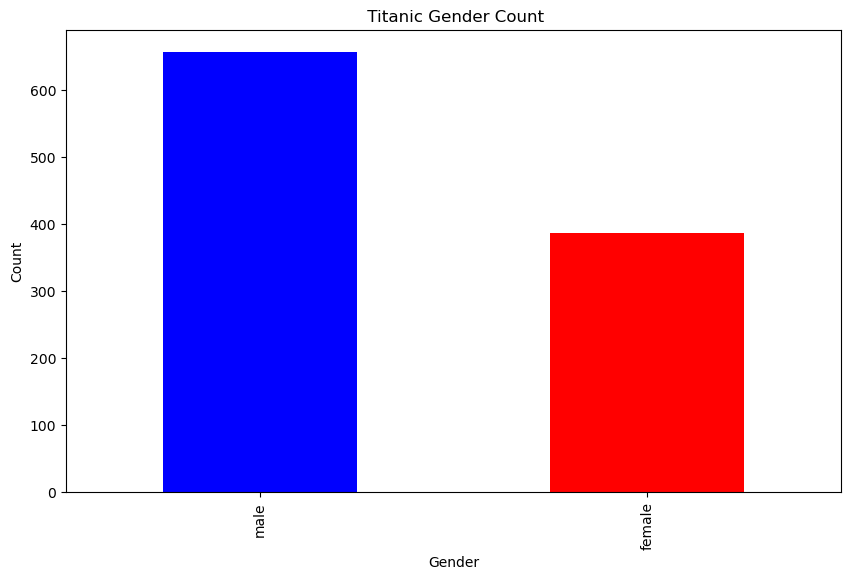

In [425]:
plt.figure(figsize=(10, 6))
ship_gender.plot(kind = 'bar', color = ['blue', 'red'])
plt.title(' Titanic Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Barplot using plt

In [426]:
ship_gender2 = df.groupby('gender')['survived'].value_counts()
ship_gender2

gender  survived
female  1           290
        0            96
male    0           522
        1           135
Name: count, dtype: int64

In [427]:
ship_gender2 = df.groupby('gender')['survived'].value_counts().unstack()
ship_gender2

# .unstack() formats information in preparation for plotting.

survived,0,1
gender,,
female,96,290
male,522,135


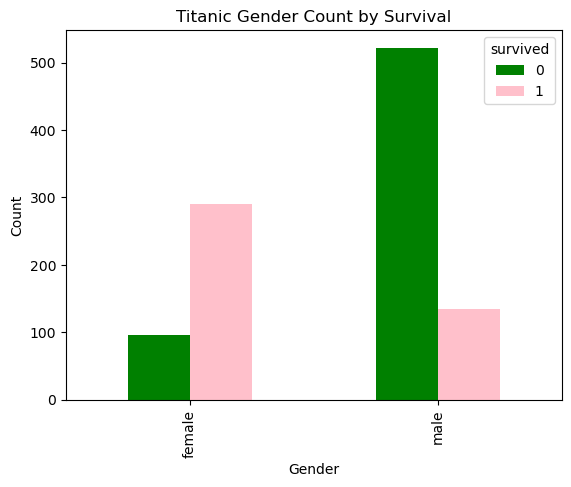

In [428]:
ship_gender2 = df.groupby('gender')['survived'].value_counts().unstack()


ship_gender2.plot(kind='bar', color=['green', 'pink'])
plt.title('Titanic Gender Count by Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#stacked = True,  if desired

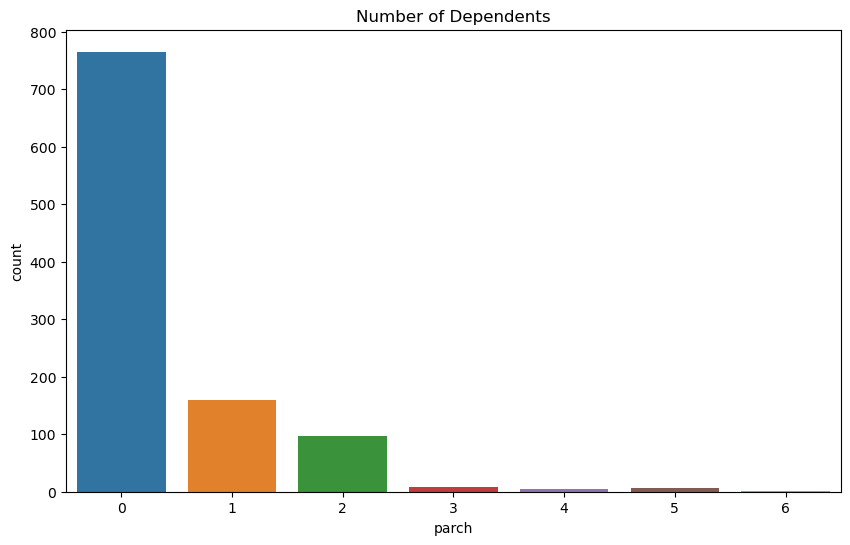

In [429]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'parch', data = df)
plt.title('Number of Dependents')
plt.show()

# Barplot using seaborn

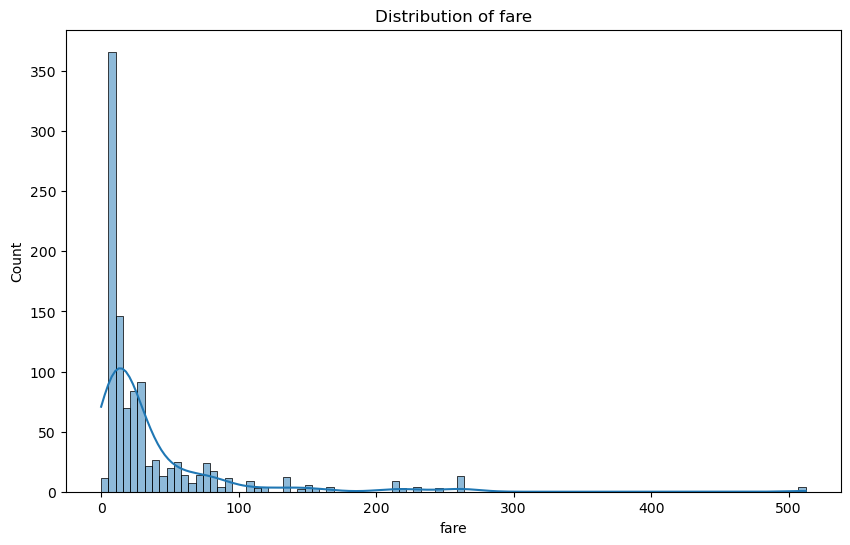

In [430]:

plt.figure(figsize = (10, 6))
sns.histplot(df['fare'], kde = True,)
plt.title('Distribution of fare')
plt.show()

# Histogram

/Users/jose/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


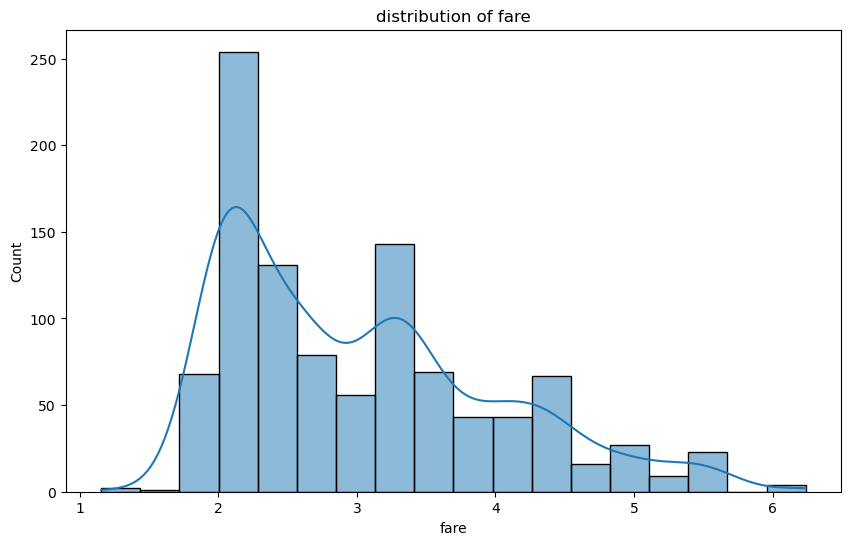

In [431]:
LOG_F = np.log(df['fare'])

plt.figure(figsize = (10, 6))
sns.histplot(LOG_F, kde = True,)
plt.title('distribution of fare')
plt.show()

# Histogram using log for best interpretation 

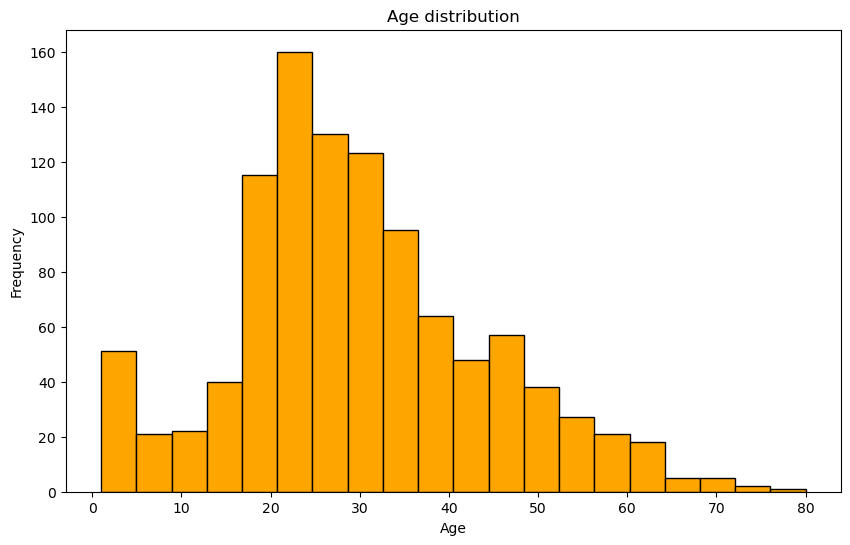

In [432]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins = 20, color = 'orange', edgecolor = 'k')
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram

In [433]:
print(df.age.min())
print(df.age.max())

# Find minimum and maximum value of age

1
80


In [434]:
bins = [0,10,20,30,40,50,60,70,80] 

df['age range'] = pd.cut(df['age'], bins)

# Create 8 bins

# Use pd.cut to group values of age into 8 bins

In [435]:
age_groups = df['age range'].value_counts().sort_index()

# Counts from each age group sorted from [0, 10] ... [70, 80]

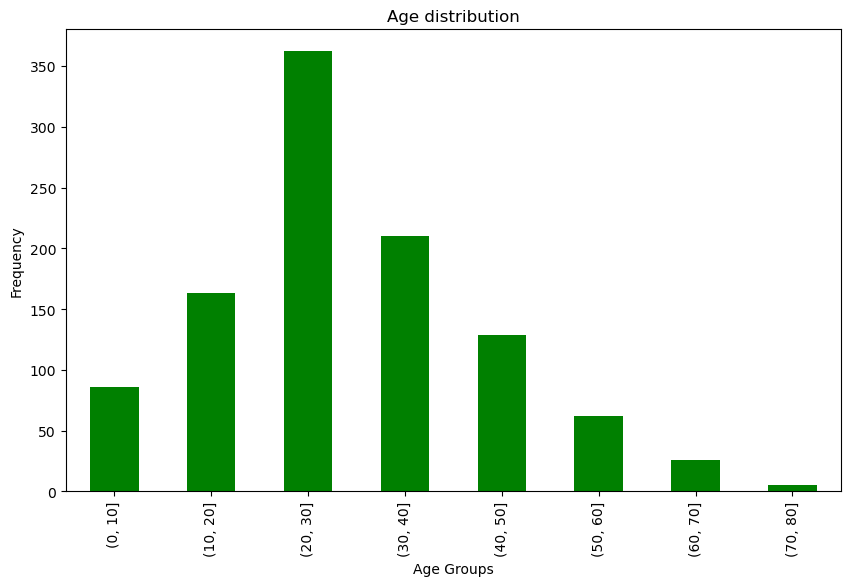

In [436]:
plt.figure(figsize=(10, 6))
age_groups.plot(kind = 'bar', color = 'green')
plt.title("Age distribution")
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()

# Fit age groups to plot

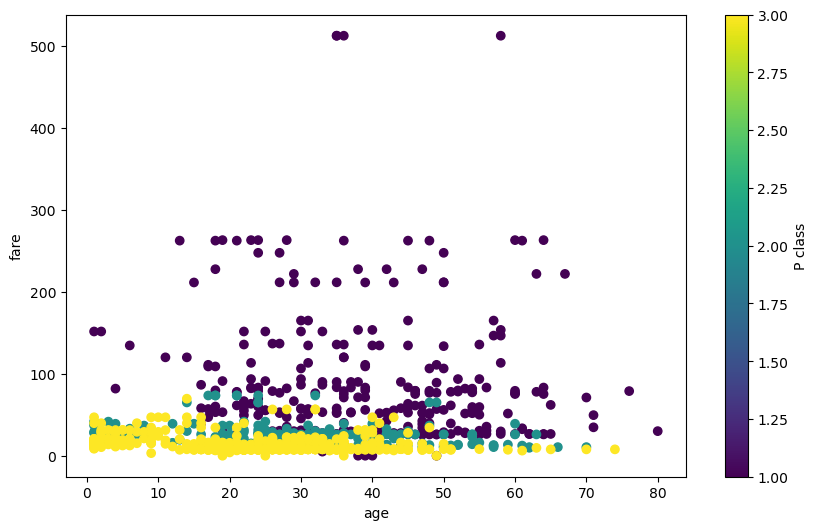

In [437]:

plt.figure(figsize=(10, 6))

plt.scatter(x = df['age'], y = df['fare'], c=df['pclass'])
plt.colorbar(label='P class')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

# Scatterplot

In [438]:
df_corr = df.drop(columns = ['embarked','age range', 'gender', 'ticket', 'till 100', 'elderly'])

# Heat map

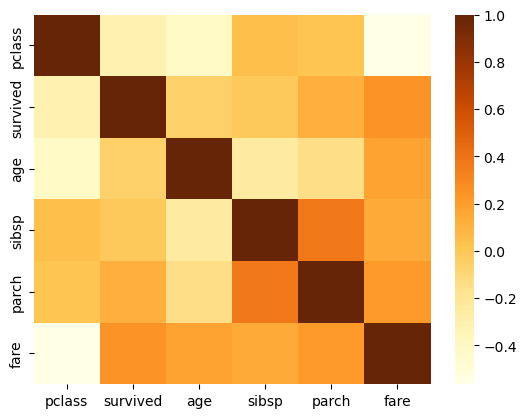

In [439]:
sns.heatmap(df_corr.corr(), cmap = 'YlOrBr')
plt.show()

# annot=True, fmt='.1f'

Description of Variables

Survived: A binary variable that indicates survival status, with 0 meaning "No" and 1 meaning "Yes"

Pclass: A categorical variable that indicates passenger class, with 1 being 1st class, 2 being 2nd class, and 3 being 3rd class 

Sex: A categorical variable that indicates passenger gender 

Age: A quantitative variable that indicates passenger age 

SibSp: A variable that indicates the number of siblings and spouses aboard 

Parch: A variable that indicates the number of parents and children aboard 

Fare: A numerical variable that indicates the fare paid for the ticket 

In [ ]:
#